# Working With A Baseline Model

A **baseline** model is a simple version of the neural network that we create to fit to our data and gradually we make improvements and run experiments to improve upon the performance of the baseline model. When working with neural networks, it is always recommended to start with a baseline model first.

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from utils import get_dir, generate_classes, plot_history

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = get_dir()/'pizza_steak'/'train'
test_dir = get_dir()/'pizza_steak'/'test'

train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [5]:
baseline = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

Metal device set to: Apple M1 Pro


2023-01-21 11:58:18.883513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-21 11:58:18.883930: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
baseline.compile(loss=BinaryCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [7]:
history = baseline.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5


2023-01-21 11:58:24.769866: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-21 11:58:24.967699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6062 - accuracy: 0.6887

2023-01-21 11:58:28.836454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 104ms/step - loss: 0.6062 - accuracy: 0.6887 - val_loss: 0.4439 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4105 - accuracy: 0.8253 - val_loss: 0.3952 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.3070 - accuracy: 0.8840 - val_loss: 0.3704 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 4s 89ms/step - loss: 0.1566 - accuracy: 0.9487 - val_loss: 0.4726 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 4s 89ms/step - loss: 0.0695 - accuracy: 0.9847 - val_loss: 0.5729 - val_accuracy: 0.7880


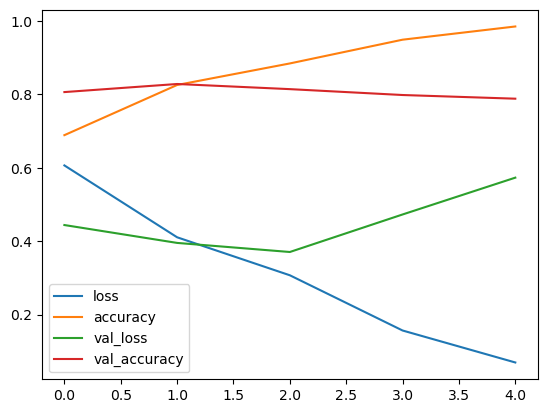

In [8]:
pd.DataFrame(history.history).plot()
plt.show()

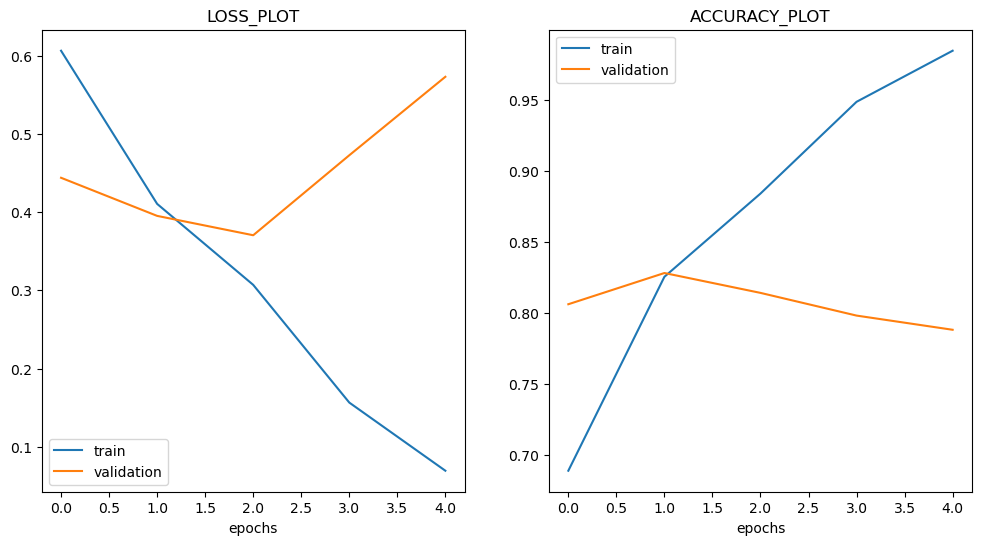

In [9]:
plot_history(history)

## Overfitting
It is a condition when the model performs well on the training data but fails to perform well on the validation or test data, i.e. _the model fails to generalize on unseen data._  

- If the validation loss is more than the training loss, the data is **overfitting**
- To check for overfit from the history plot, the plot of the validation curve must be above the plot of the loss curve and they should be separated by a fair margin of gap


#### Steps To Reduce Overfitting

- Decrease the complexity of the model (lesser layers/lesser hidden units/lesser feature extractors etc.)
- Introduce data augmentation (modify existing training data to create more scenarios)
- Add regularization (eg. dropout/max-pooling etc.)

In [10]:
train_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_dir = get_dir()/'pizza_steak'/'train'
test_dir = get_dir()/'pizza_steak'/'test'

train_data = train_generator.flow_from_directory(directory=train_dir,
                                                 batch_size=32,
                                                 target_size=(224, 224),
                                                 class_mode='binary',
                                                 seed=42)

test_data = test_generator.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
model = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [13]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5


2023-01-21 11:59:22.685939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6031 - accuracy: 0.6593

2023-01-21 11:59:26.452821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 102ms/step - loss: 0.6031 - accuracy: 0.6593 - val_loss: 0.4705 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4670 - accuracy: 0.7853 - val_loss: 0.3993 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4188 - accuracy: 0.8113 - val_loss: 0.3633 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 4s 88ms/step - loss: 0.3813 - accuracy: 0.8340 - val_loss: 0.3503 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 4s 87ms/step - loss: 0.3609 - accuracy: 0.8420 - val_loss: 0.3452 - val_accuracy: 0.8460


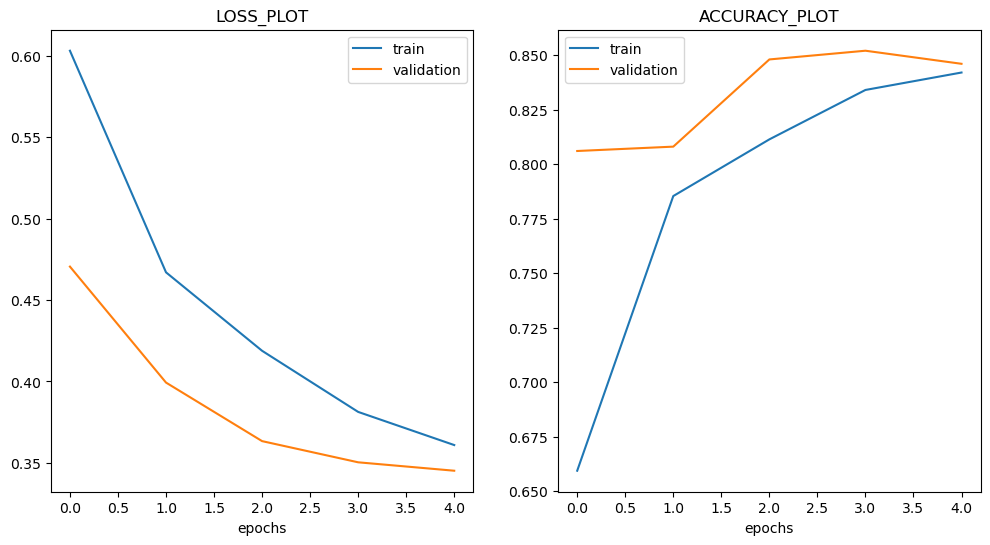

In [14]:
plot_history(history)

In [15]:
baseline.summary(), model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
____________________________

(None, None)

## Data Augmentation

Data augmentation is a technique of introducing more diversity into the training data by creating new scenarios that were not present earlier in training data. This allows the model to learn more patterns and generalize better. Some common data augmentation techniques when working with image data are _rotation_, _flipping (horizontal/vertical)_, _cropping_ etc.  

#### Note
- Data augmentation is **only** applied to the training data and never on the test data! This is because the purpose of data augmentation is to introduce more scenarios into the training data whereas the purpose of test data is to only evaluate the performance of the model!

- Data augmentation usually happens on the fly (on the CPU) before being loaded into the model (inside the GPU)

In [16]:
train_generator_augmented = ImageDataGenerator(rescale=1./255,
                                               rotation_range=0.2,
                                               shear_range=0.2,
                                               zoom_range=0.2,
                                               width_shift_range=0.2,
                                               height_shift_range=0.3,
                                               horizontal_flip=True)

train_data_augmented = train_generator_augmented.flow_from_directory(directory=train_dir,
                                                                     batch_size=32,
                                                                     target_size=(224, 224),
                                                                     class_mode='binary',
                                                                     shuffle=False)

Found 1500 images belonging to 2 classes.


In [17]:
train_generator = ImageDataGenerator(rescale=1./255)

train_data = train_generator.flow_from_directory(directory=train_dir,
                                                 batch_size=32,
                                                 target_size=(224, 224),
                                                 class_mode='binary',
                                                 shuffle=False)

Found 1500 images belonging to 2 classes.


In [18]:
images, _ = train_data.next()
augmented_images, _ = train_data_augmented.next()

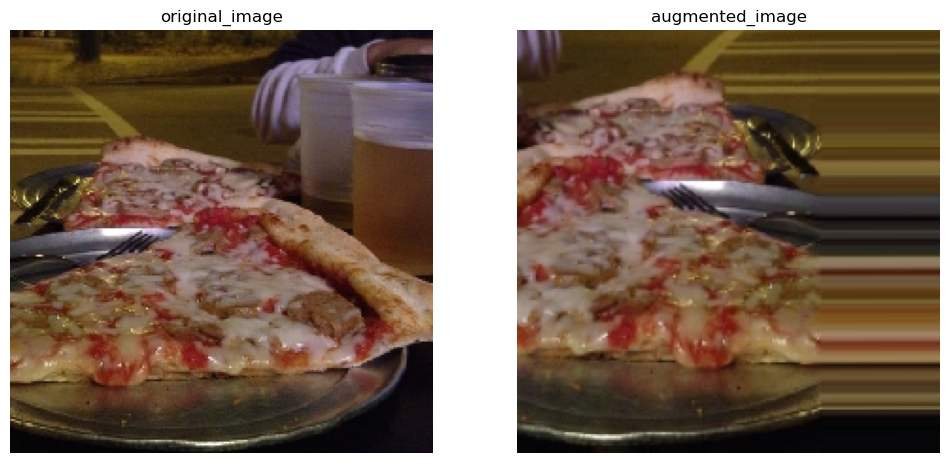

In [22]:
import random

r = random.randint(0, 32)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.imshow(images[r])
plt.axis('off')
plt.title('original_image')

plt.subplot(1,2,2)
plt.imshow(augmented_images[r])
plt.axis('off')
plt.title('augmented_image')

plt.show()

In [23]:
history = model.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 264ms/step - loss: 0.6735 - accuracy: 0.6507 - val_loss: 0.4798 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 0.5884 - accuracy: 0.7107 - val_loss: 0.4422 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.5955 - accuracy: 0.6620 - val_loss: 0.4589 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.5584 - accuracy: 0.7293 - val_loss: 0.4176 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.5632 - accuracy: 0.7153 - val_loss: 0.3991 - val_accuracy: 0.8480


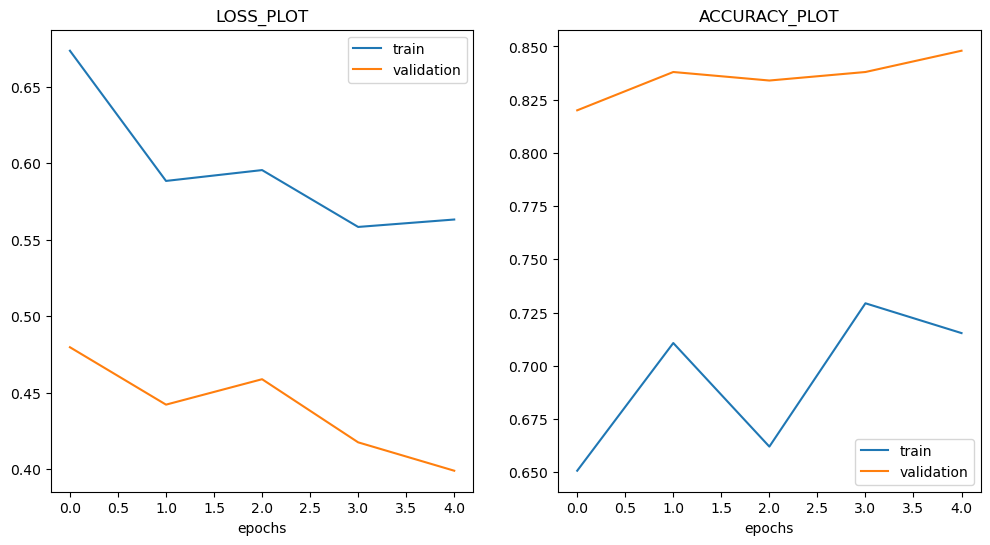

In [24]:
plot_history(history)

### Training With Shuffled Data

In [25]:
train_data_augmented = train_generator_augmented.flow_from_directory(directory=train_dir,
                                                                     batch_size=32,
                                                                     target_size=(224, 224),
                                                                     class_mode='binary',
                                                                     seed=42)

Found 1500 images belonging to 2 classes.


In [26]:
history = model.fit(train_data_augmented,
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 241ms/step - loss: 0.5090 - accuracy: 0.7687 - val_loss: 0.3550 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4859 - accuracy: 0.7747 - val_loss: 0.3420 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4593 - accuracy: 0.7940 - val_loss: 0.3320 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4597 - accuracy: 0.7920 - val_loss: 0.3164 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4535 - accuracy: 0.8000 - val_loss: 0.3248 - val_accuracy: 0.8560


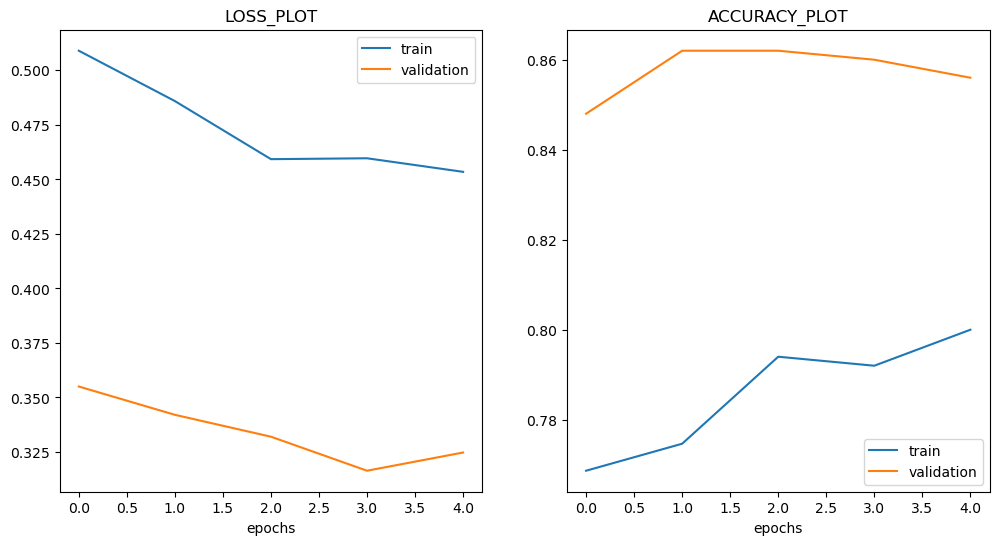

In [27]:
plot_history(history)

## Tips To Improve Model Performance

- Add more layers to the model (eg. more `Conv2D` layers or `MaxPool2D` layers)
- Increase the number of filters in each convolutional layer (32 is a very popular number!)
- Train for longer (more epochs!)
- Find an ideal learning rate
- Get more data
- Use **transfer learning** to generalize better (we leverage what another model has already learned and adjust it for our own use case)

In [50]:
train_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=20,
                                     zoom_range=0.4,
                                     shear_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.3,
                                     horizontal_flip=True)

test_generator = ImageDataGenerator(rescale=1./255)

train_dir = get_dir()/'pizza_steak'/'train'
test_dir = get_dir()/'pizza_steak'/'test'

train_data = train_generator.flow_from_directory(directory=train_dir,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 seed=42
)

test_data = test_generator.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=3,
                                               class_mode='binary',
                                               shuffle=True,
                                               seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [51]:
model = Sequential([
    Conv2D(64, 3, activation='relu', padding='same', input_shape=(224, 224, 3)),
    
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(2),
    
    Conv2D(32, 3, activation='relu', padding='same'),
    
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPool2D(2),
    
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [52]:
model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])

In [53]:
history = model.fit(train_data,
                    epochs=8,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/8


2023-01-21 14:09:45.368441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6675 - accuracy: 0.6107

2023-01-21 14:09:56.203355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 13s 268ms/step - loss: 0.6675 - accuracy: 0.6107 - val_loss: 0.4680 - val_accuracy: 0.7820
Epoch 2/8
47/47 [==============================] - 12s 255ms/step - loss: 0.5508 - accuracy: 0.7287 - val_loss: 0.4268 - val_accuracy: 0.8300
Epoch 3/8
47/47 [==============================] - 12s 256ms/step - loss: 0.5575 - accuracy: 0.7147 - val_loss: 0.4058 - val_accuracy: 0.8380
Epoch 4/8
47/47 [==============================] - 12s 258ms/step - loss: 0.4993 - accuracy: 0.7680 - val_loss: 0.3442 - val_accuracy: 0.8500
Epoch 5/8
47/47 [==============================] - 12s 258ms/step - loss: 0.4904 - accuracy: 0.7593 - val_loss: 0.3652 - val_accuracy: 0.8480
Epoch 6/8
47/47 [==============================] - 12s 257ms/step - loss: 0.4810 - accuracy: 0.7727 - val_loss: 0.3264 - val_accuracy: 0.8560
Epoch 7/8
47/47 [==============================] - 12s 258ms/step - loss: 0.5151 - accuracy: 0.7533 - val_loss: 0.3561 - val_accuracy: 0.8540
Epoch 8/8
47/47 

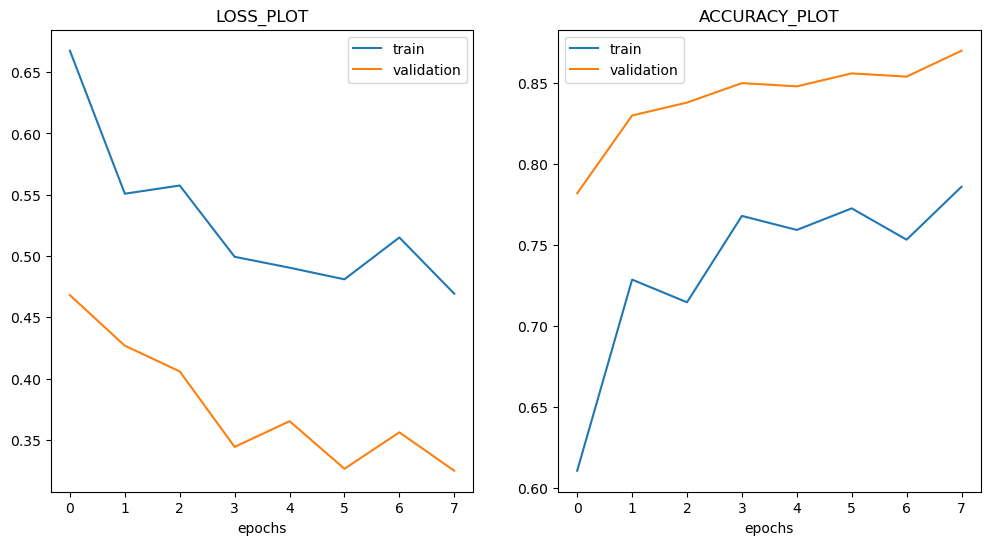

In [54]:
plot_history(history)

In [76]:
model.save(get_dir()/'models'/'pizza_steak_model')

INFO:tensorflow:Assets written to: /Users/enigma6174/Dev/courses/tensorflow-learn/cnn/data/models/pizza_steak_model/assets


INFO:tensorflow:Assets written to: /Users/enigma6174/Dev/courses/tensorflow-learn/cnn/data/models/pizza_steak_model/assets


In [78]:
from tensorflow.keras.models import load_model

_model = load_model(get_dir()/'models'/'pizza_steak_model')
_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 32)      18464     
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

## Making Predictions On Images

We will use images downloaded from the internet to make predictions on them using the model

In [9]:
from tensorflow.keras.models import load_model

_model = load_model(get_dir()/'models'/'pizza_steak_model')
_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 32)      18464     
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [101]:
from PIL import Image
from utils import get_dir

for image_file in sorted((get_dir()/'pizza_steak'/'predict').glob('*')):
    if str(image_file).split('.')[-1] == 'webp':
        img = Image.open(image_file).convert('RGB')
        filename = str(image_file).split('/')[-1]
        filename = filename.split('.')[0] + '.jpeg'
        img.save(filename, 'jpeg')

In [103]:
from utils import clean_data

clean_data(get_dir()/'pizza_steak'/'predict')

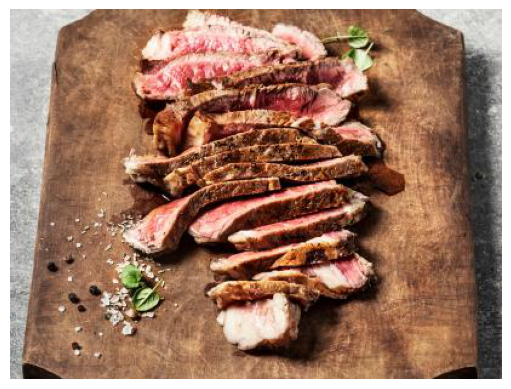

In [104]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = [item for item in sorted((get_dir()/'pizza_steak'/'predict').glob('*'))]
r = random.randint(0, len(images))
img = mpimg.imread(images[r])

plt.figure()
plt.axis('off')
plt.imshow(img)
plt.show()

In [58]:
from utils import process_image

image = process_image(images[r])
image.shape

TensorShape([224, 224, 3])

In [60]:
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.51008403, 0.28539917, 0.18298322],
        [0.5067227 , 0.27927172, 0.19131653],
        [0.5033614 , 0.27591038, 0.19516808],
        ...,
        [0.9280111 , 0.8456582 , 0.9044817 ],
        [0.92549026, 0.8414566 , 0.9011205 ],
        [0.92520994, 0.83501387, 0.89775896]],

       [[0.51792717, 0.28263307, 0.18851542],
        [0.5145658 , 0.2761905 , 0.19131653],
        [0.51120454, 0.2719888 , 0.18963587],
        ...,
        [0.9280111 , 0.8456582 , 0.9044817 ],
        [0.92549026, 0.8414566 , 0.9011205 ],
        [0.92520994, 0.83501387, 0.89775896]],

       [[0.5195029 , 0.27636555, 0.19401261],
        [0.5195029 , 0.27636555, 0.19401261],
        [0.5195029 , 0.27636555, 0.18616948],
        ...,
        [0.92549026, 0.8431373 , 0.90196085],
        [0.9263306 , 0.84229696, 0.90196085],
        [0.9294118 , 0.83921576, 0.90196085]],

       ...,

       [[0.91488874, 0.8966731 , 0.8647897 ],
        [0.95

In [78]:
import tensorflow as tf

t = model.predict(tf.expand_dims(image, axis=0))
print('%0.2f' % t[0][0])

1/1 [==============================] - 0s 11ms/step
0.41


In [105]:
from utils import generate_classes

classes = generate_classes(get_dir()/'pizza_steak'/'train')
classes

array(['pizza', 'steak'], dtype='<U5')

In [126]:
def make_predictions_binary(model, file, class_names):
    '''
    Make prediction on the input file and display the image along with predicted class
    '''
    # process the image before making prediction
    img = process_image(file)
    
    # get the prediction and predicted class
    pred = model.predict(tf.expand_dims(img, axis=0), verbose=0)
    pred_class = class_names[int(tf.round(pred))]
    
    return (img, pred_class)

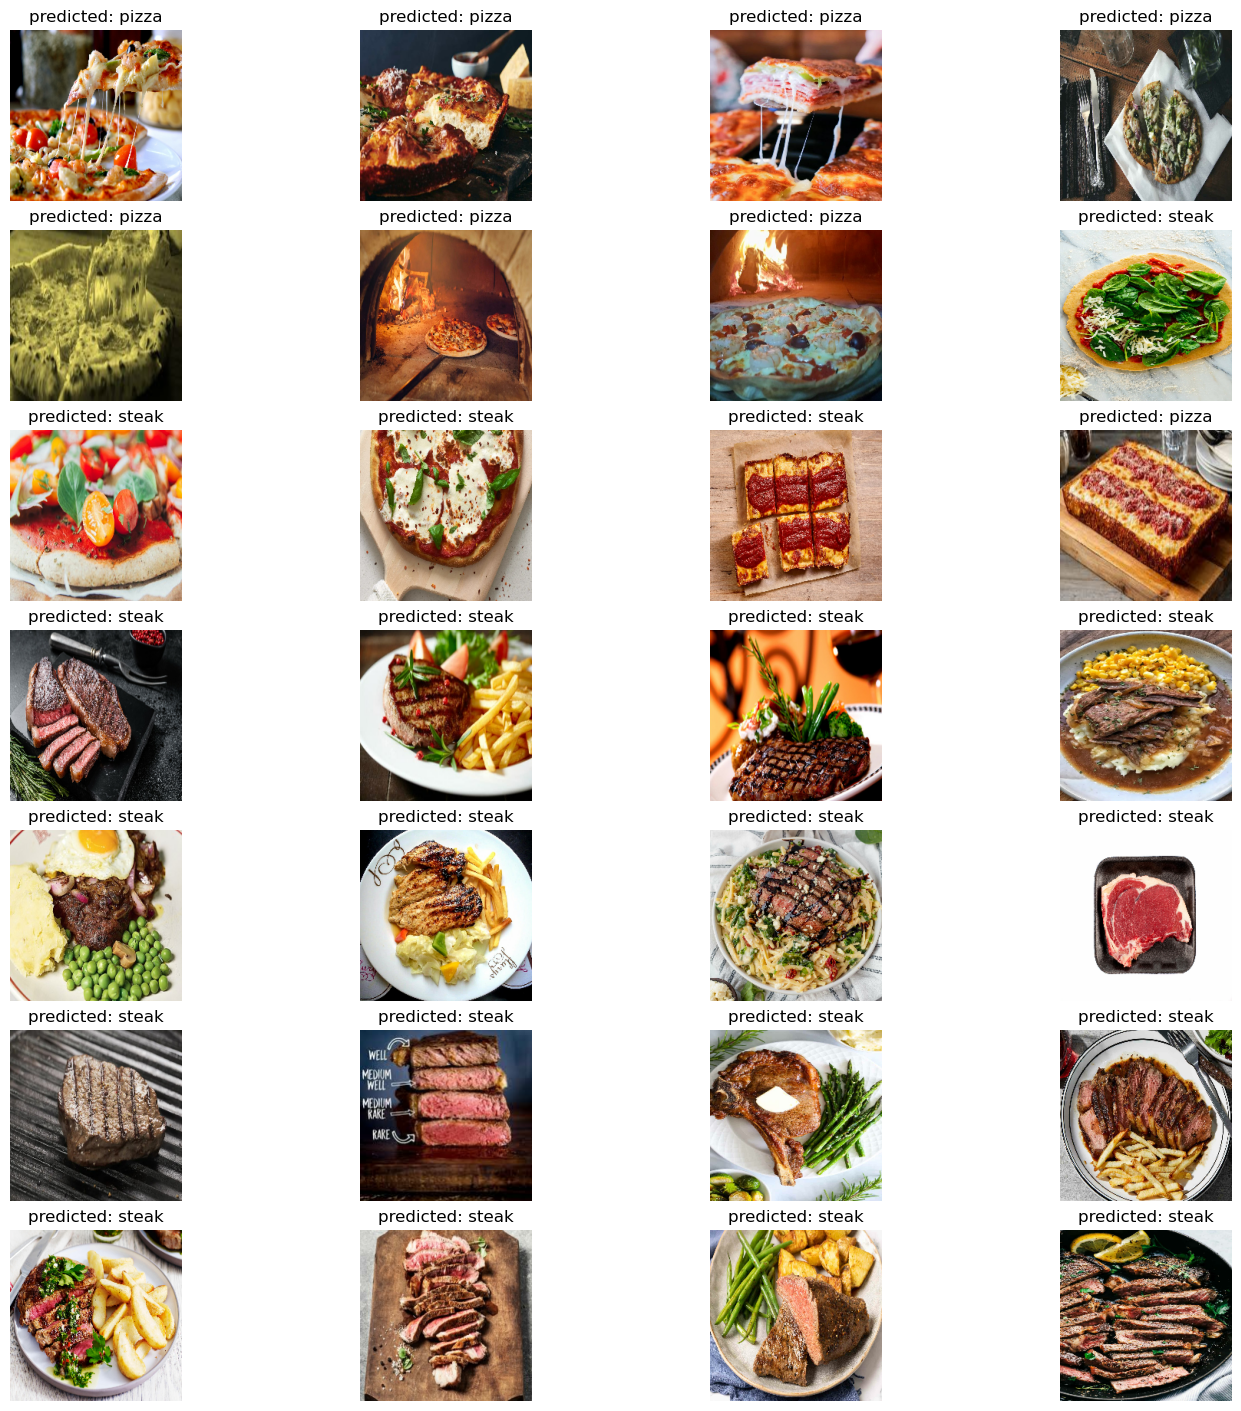

In [178]:
fig = plt.figure(figsize=(14,14))
fig.set_constrained_layout(True)

nrows = 7
ncols = 4

for i, image in enumerate(images):
    img, pred = make_predictions_binary(model, image, classes)
    fig.add_subplot(nrows, ncols, i+1)
    plt.imshow(img)
    plt.title(f'predicted: {pred}')
    plt.axis('off')

In [144]:
ax

<AxesSubplot:>